In [363]:
"""
# India Terrorism Data Analysis

# Objective
This notebook performs an exploratory data analysis (EDA) of terrorism-related incidents in India using open-source datasets.  
The goal is to identify temporal, regional, and categorical patterns and examine their alignment with major security and policy events.

# Scope
- Geographic focus: India  
- Time span: Based on available GTD data  
- Nature of analysis: Descriptive and exploratory (no causal claims)
"""


'\n# India Terrorism Data Analysis\n\n# Objective\nThis notebook performs an exploratory data analysis (EDA) of terrorism-related incidents in India using open-source datasets.  \nThe goal is to identify temporal, regional, and categorical patterns and examine their alignment with major security and policy events.\n\n# Scope\n- Geographic focus: India  \n- Time span: Based on available GTD data  \n- Nature of analysis: Descriptive and exploratory (no causal claims)\n'

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
plt.style.use("default")


In [365]:
global_df=pd.read_csv(r"C:\Users\byome\Phyton Project\india_terrorism_data analysis\data\raw\GlobalTerrorismDatabase_for_Analysis.csv", low_memory=False)

In [366]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Columns: 135 entries, eventid to related
dtypes: float64(54), int64(23), object(58)
memory usage: 216.0+ MB


In [367]:
work_df=global_df[global_df["country_txt"]=="India"]

In [368]:
work_df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
1186,197202220004,1972,2,22,NaN,0,NaN,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,4,Hijacking,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,B-747,75.0,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palestinians,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,1.0,187.0,0.0,NaN,NaN,Yemen,Yemen,1.0,5000000.0,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,187.0,NaN,NaN,NaN,NaN,Hijacking DB,1,1,1,1,NaN
2763,197501190004,1975,1,2,NaN,0,NaN,92,India,6,South Asia,Bihar,Samastipur,25.863042,85.781004,1.0,0,The attack occurred in the town,"1/2/1975: The Indian Railway Minister, Lalit N...",1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),18.0,"Government Personnel (excluding police, military)",Railway Minister of India and legislator,Lalit Narayan Mishra and a legislator,92.0,India,3.0,Police,25.0,Police Security Forces/Officers,Guards,2 Guards,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ananda Marga,NaN,NaN,NaN,NaN,NaN,Unknown,1.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No additional information available.,4.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The case is very unclear and there are many ru...,"""Leaders of India Irate at Killing: Death of A...","Dhananjay Mahapatra, ""SC: Why has LN Mishra mu...",NaN,UMD Encyclopedia of World Terrorism 2012,0,0,0,0,NaN
3856,197605260001,1976,5,26,NaN,0,NaN,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,44.0,Airport,NaN,New Delhi airport,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
5326,197709280004,1977,9,28,NaN,0,NaN,92,India,6,South Asia,Maharashtra,Bombay,19.075984,72.877656,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,4,Hijacking,NaN,NaN,NaN,NaN,6,Airports & 

In [369]:
work_df.shape

(13929, 135)

In [370]:

india_df=work_df[(work_df["iyear"]>=2000)&(work_df["iyear"]<=2020)]

In [371]:
india_df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
69835,200001010003,2000,1,1,NaN,0,NaN,92,India,6,South Asia,Jammu and Kashmir,Udhampur,32.925224,75.135264,1.0,0,NaN,01/01/2000: Members of Lashkar-e Taiba attacke...,1,1,1,1,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Central Reserve Police Force,The Central Reserve Police Force 68 battalion ...,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lashkar-e-Taiba (LeT),NaN,NaN,NaN,NaN,NaN,Unknown,0.0,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A sniper rifle was used in addition to other g...,1.0,0.0,NaN,2.0,0.0,NaN,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,“Lashkar 'Suicide' Squad Attacks Army Camp in ...,NaN,NaN,CETIS,1,1,0,1,NaN
69839,200001010007,2000,1,1,NaN,0,NaN,92,India,6,South Asia,Assam,Kakotibari,27.091373,95.023955,1.0,0,NaN,01/01/2000: An Oil and Natural Gas Commission ...,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,21,Utilities,NaN,NaN,Oil and Natural Gas Commission,An Oil and Natural Gas Commission pipeline at ...,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Liberation Front of Assam (ULFA),NaN,NaN,NaN,NaN,NaN,Unknown,1.0,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,14.0,Time Fuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,NaN,Approximately 10 feet of pipeline was damaged.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,“India: ULFA Militants Blow Up Oil Pipeline in...,NaN,NaN,CETIS,0,0,0,0,NaN
69867,200001030003,2000,1,3,NaN,0,NaN,92,India,6,South Asia,Jammu and Kashmir,Srinagar,34.083740,74.789902,1.0,0,NaN,01/03/2000: A bomb exploded at a vegetable mar...,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,74.0,Marketplace/Plaza/Square,Marketplace,A vegetable market in Srinagar,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,Unknown,0.0,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,8.0,Landmine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The bomb could have either been a surface mine...,18.0,0.0,0.0,30.0,0.0,0.0,1,4.0,Unknown,NaN,A number of carts and stalls in the market are...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Law Kumar Mishra, “Eighteen People Killed in L...",“Two BSF Soldiers A

In [372]:
india_post_2000_df=india_df[['iyear','imonth','iday','provstate','city','attacktype1_txt','targtype1_txt','targsubtype1_txt','target1','gname','weaptype1_txt','nkill','nwound','summary','scite1']]

In [373]:
india_post_2000_df

,iyear,imonth,iday,provstate,city,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,gname,weaptype1_txt,nkill,nwound,summary,scite1
69835,2000,1,1,Jammu and Kashmir,Udhampur,Armed Assault,Police,"Police Building (headquarters, station, school)",The Central Reserve Police Force 68 battalion ...,Lashkar-e-Taiba (LeT),Firearms,1.0,2.0,01/01/2000: Members of Lashkar-e Taiba attacke...,“Lashkar 'Suicide' Squad Attacks Army Camp in ...
69839,2000,1,1,Assam,Kakotibari,Bombing/Explosion,Utilities,NaN,An Oil and Natural Gas Commission pipeline at ...,United Liberation Front of Assam (ULFA),Explosives,0.0,0.0,01/01/2000: An Oil and Natural Gas Commission ...,“India: ULFA Militants Blow Up Oil Pipeline in...
69867,2000,1,3,Jammu and Kashmir,Srinagar,Bombing/Explosion,Private Citizens & Property,Marketplace/Plaza/Square,A vegetable market in Srinagar,Unknown,Explosives,18.0,30.0,01/03/2000: A bomb exploded at a vegetable mar...,"Law Kumar Mishra, “Eighteen People Killed in L..."
69887,2000,1,6,Delhi,New Delhi,Bombing/Explosion,Transportation,Train/Train Tracks/Trolley,A passenger train at the Old Delhi train station,Unknown,Explosives,0.0,23.0,01/06/2000: A bomb exploded on a passenger tra...,"“23 injured in Delhi railway station blast,” T..."
69888,2000,1,7,Andhra Pradesh,Unknown,Bombing/Explosion,Government (General),Politician or Political Party Movement/Meeting...,"G. Sukhender Reddy, Telugu Desam Party Member ...",People's War Group (PWG),Explosives,0.0,0.0,01/07/2000: Six Maoist guerrillas from the Peo...,“Extremists Blast House of Ruling Party MP in ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209681,2020,12,30,Chhattisgarh,Pusnar,Bombing/Explosion,Unknown,NaN,Unknown,Maoists,Explosives,0.0,1.0,12/30/2020: An explosive device detonated whil...,"""Chhattisgarh: CAF jawan injured in IED blast,..."
209684,2020,12,30,Jammu and Kashmir,Jandi,Bombing/Explosion,Religious Figures/Institutions,Place of Worship,Temple,Unknown,Explosives,0.0,0.0,12/30/2020: Assailants threw a grenade at a te...,"""Terrorist throws hand grenade at historic tem..."
209686,2020,12,30,Odisha,Malakangiri,Bombing/Explosion,Military,"Military Personnel (soldiers, troops, officers...",Security Forces,Maoists,Explosives,0.0,1.0,12/30/2020: An explosive device detonated targ...,"""Maoist Landmine Blast In Odisha-Chhattisgarh ..."
209692,2020,12,31,Jammu and Kashmir,Srinagar,Armed Assault,Business,Retail/Grocery/Bakery,Jeweler: Satpal Singh Nischal,The Resistance Front (TRF),Firearms,1.0,0.0,12/31/2020: Assailants shot and killed Satpal ...,"""Police access CCTV footage, get leads in jewe..."


In [374]:
india_post_2000_df['date'] = pd.to_datetime(
    {
        'year': india_post_2000_df['iyear'],
        'month': india_post_2000_df['imonth'],
        'day': india_post_2000_df['iday']
    },
    errors='coerce'
)


C:\Users\byome\AppData\Local\Temp\ipykernel_22584\3782334613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_post_2000_df['date'] = pd.to_datetime(


In [375]:
india_post_2000_df

,iyear,imonth,iday,provstate,city,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,gname,weaptype1_txt,nkill,nwound,summary,scite1,date
69835,2000,1,1,Jammu and Kashmir,Udhampur,Armed Assault,Police,"Police Building (headquarters, station, school)",The Central Reserve Police Force 68 battalion ...,Lashkar-e-Taiba (LeT),Firearms,1.0,2.0,01/01/2000: Members of Lashkar-e Taiba attacke...,“Lashkar 'Suicide' Squad Attacks Army Camp in ...,2000-01-01
69839,2000,1,1,Assam,Kakotibari,Bombing/Explosion,Utilities,NaN,An Oil and Natural Gas Commission pipeline at ...,United Liberation Front of Assam (ULFA),Explosives,0.0,0.0,01/01/2000: An Oil and Natural Gas Commission ...,“India: ULFA Militants Blow Up Oil Pipeline in...,2000-01-01
69867,2000,1,3,Jammu and Kashmir,Srinagar,Bombing/Explosion,Private Citizens & Property,Marketplace/Plaza/Square,A vegetable market in Srinagar,Unknown,Explosives,18.0,30.0,01/03/2000: A bomb exploded at a vegetable mar...,"Law Kumar Mishra, “Eighteen People Killed in L...",2000-01-03
69887,2000,1,6,Delhi,New Delhi,Bombing/Explosion,Transportation,Train/Train Tracks/Trolley,A passenger train at the Old Delhi train station,Unknown,Explosives,0.0,23.0,01/06/2000: A bomb exploded on a passenger tra...,"“23 injured in Delhi railway station blast,” T...",2000-01-06
69888,2000,1,7,Andhra Pradesh,Unknown,Bombing/Explosion,Government (General),Politician or Political Party Movement/Meeting...,"G. Sukhender Reddy, Telugu Desam Party Member ...",People's War Group (PWG),Explosives,0.0,0.0,01/07/2000: Six Maoist guerrillas from the Peo...,“Extremists Blast House of Ruling Party MP in ...,2000-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209681,2020,12,30,Chhattisgarh,Pusnar,Bombing/Explosion,Unknown,NaN,Unknown,Maoists,Explosives,0.0,1.0,12/30/2020: An explosive device detonated whil...,"""Chhattisgarh: CAF jawan injured in IED blast,...",2020-12-30
209684,2020,12,30,Jammu and Kashmir,Jandi,Bombing/Explosion,Religious Figures/Institutions,Place of Worship,Temple,Unknown,Explosives,0.0,0.0,12/30/2020: Assailants threw a grenade at a te...,"""Terrorist throws hand grenade at historic tem...",2020-12-30
209686,2020,12,30,Odisha,Malakangiri,Bombing/Explosion,Military,"Military Personnel (soldiers, troops, officers...",Security Forces,Maoists,Explosives,0.0,1.0,12/30/2020: An explosive device detonated targ...,"""Maoist Landmine Blast In Odisha-Chhattisgarh ...",2020-12-30
209692,2020,12,31,Jammu and Kashmir,Srinagar,Armed Assault,Business,Retail/Grocery/Bakery,Jeweler: Satpal Singh Nischal,The Resistance Front (TRF),Firearms,1.0,0.0,12/31/2020: Assailants shot and killed Satpal ...,"""Police access CCTV footage, get leads in jewe...",2020-12-31


In [376]:
india_post_2000_df.dtypes

iyear                        int64
imonth                       int64
iday                         int64
provstate                   object
city                        object
attacktype1_txt             object
targtype1_txt               object
targsubtype1_txt            object
target1                     object
gname                       object
weaptype1_txt               object
nkill                      float64
nwound                     float64
summary                     object
scite1                      object
date                datetime64[ns]
dtype: object

In [377]:
terror_analysis_df = (
    india_post_2000_df
    .groupby('iyear')
    .agg(
        incidents=('iyear', 'count'),
        fatalities=('nkill', 'sum'),
        injuries=('nwound', 'sum')
    )
    .reset_index()
)


In [378]:
terror_analysis_df

,iyear,incidents,fatalities,injuries
0,2000,180,671.0,761.0
1,2001,234,660.0,1144.0
2,2002,184,599.0,1186.0
3,2003,196,472.0,1183.0
4,2004,108,334.0,949.0
5,2005,146,468.0,1223.0
6,2006,167,722.0,2138.0
7,2007,150,626.0,1192.0
8,2008,535,904.0,1929.0
9,2009,672,774.0,854.0


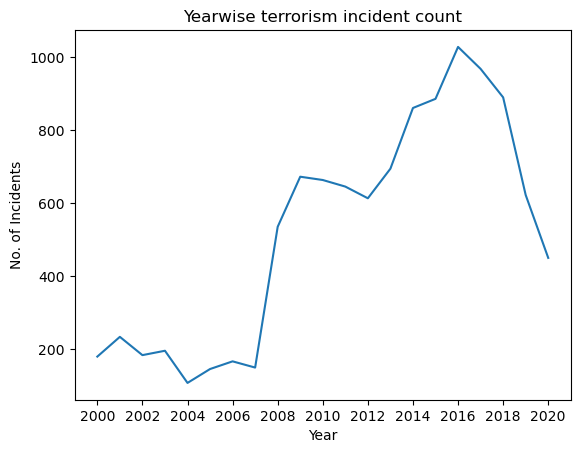

<Figure size 640x480 with 0 Axes>

In [379]:
plt.plot(terror_analysis_df['iyear'],terror_analysis_df['incidents'])
plt.xlabel('Year')
plt.ylabel('No. of Incidents')
plt.title('Yearwise terrorism incident count')
plt.xticks(ticks=range(2000, 2021, 2));
plt.figure(figsize=(6.4,4.8));


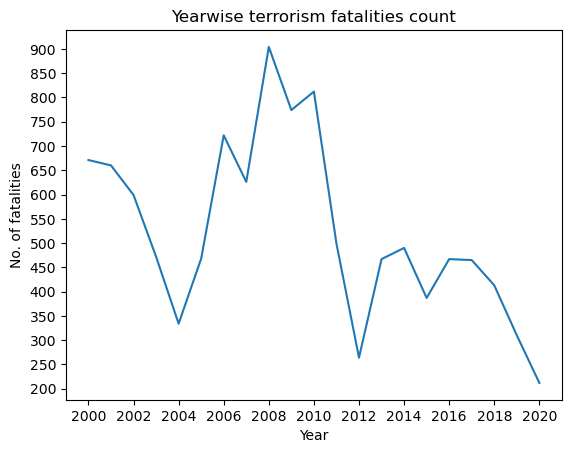

<Figure size 640x480 with 0 Axes>

In [380]:
plt.plot(terror_analysis_df['iyear'],terror_analysis_df['fatalities'])
plt.xlabel('Year')
plt.ylabel('No. of fatalities')
plt.title('Yearwise terrorism fatalities count')
plt.xticks(ticks=range(2000, 2021, 2))
plt.yticks(ticks=range(200,950,50))
plt.figure(figsize=(6.4,4.8));


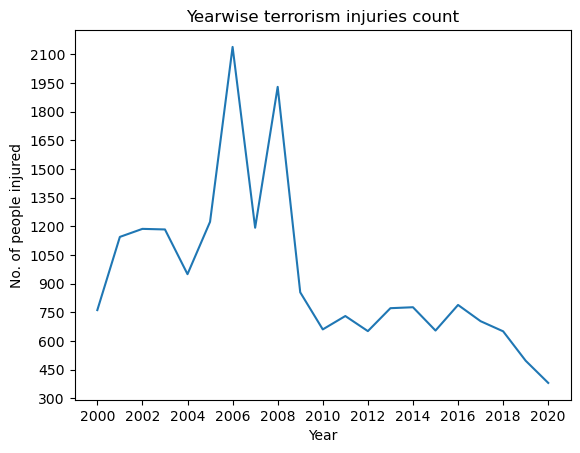

<Figure size 640x480 with 0 Axes>

In [381]:
plt.plot(terror_analysis_df['iyear'],terror_analysis_df['injuries'])
plt.xlabel('Year')
plt.ylabel('No. of people injured')
plt.title('Yearwise terrorism injuries count')
plt.xticks(ticks=range(2000, 2021, 2));
plt.yticks(ticks=range(300,2150,150))
plt.figure(figsize=(6.4,4.8));


In [382]:
plt.rcParams['font.size']=10
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['figure.facecolor']='#00000000'
sns.set_style("whitegrid")


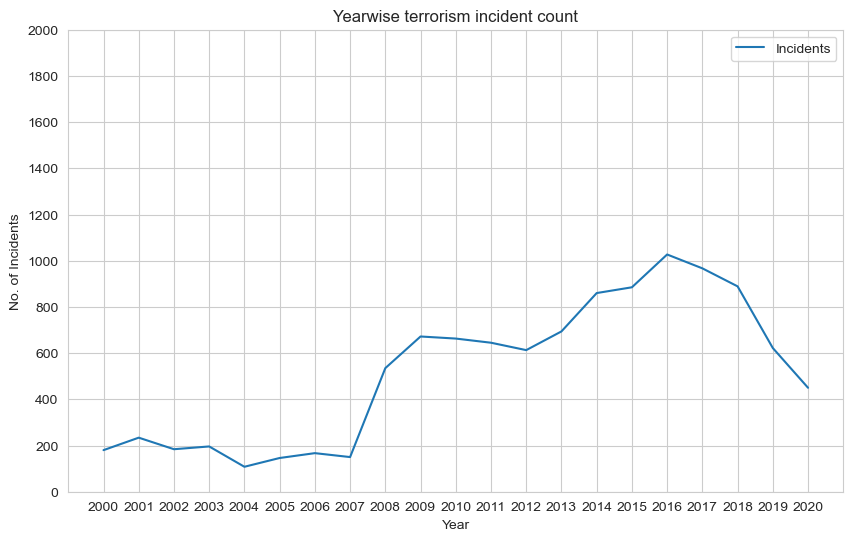

In [383]:
plt.plot(terror_analysis_df['iyear'], terror_analysis_df['incidents'], label='Incidents')
plt.xlabel('Year')
plt.ylabel('No. of Incidents')
plt.title('Yearwise terrorism incident count')
plt.xticks(ticks=range(2000, 2021, 1))
plt.yticks(ticks=range(0,2200,200))
plt.legend();



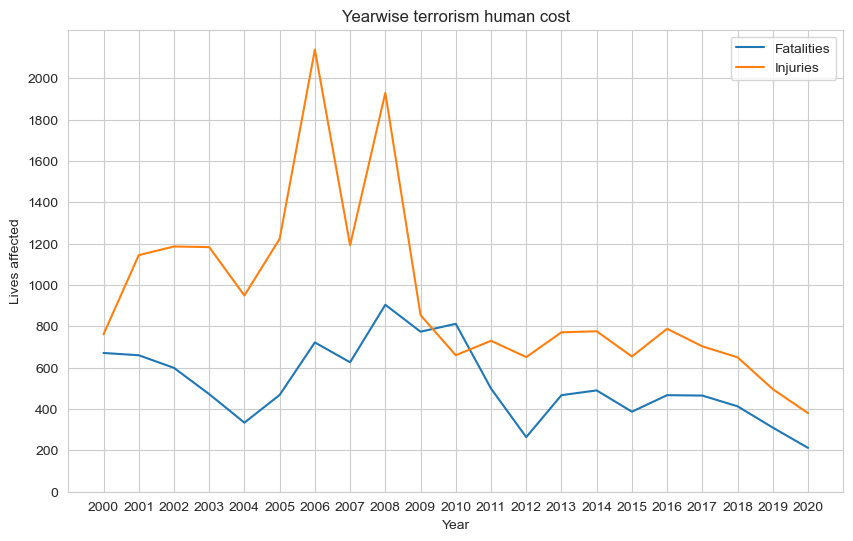

In [384]:
plt.plot(terror_analysis_df['iyear'], terror_analysis_df['fatalities'], label='Fatalities')
plt.plot(terror_analysis_df['iyear'], terror_analysis_df['injuries'], label='Injuries')
plt.xlabel('Year')
plt.ylabel('Lives affected')
plt.title('Yearwise terrorism human cost')
plt.xticks(ticks=range(2000, 2021, 1))
plt.yticks(ticks=range(0,2200,200))
plt.legend();

In [385]:
terror_analysis_df


,iyear,incidents,fatalities,injuries
0,2000,180,671.0,761.0
1,2001,234,660.0,1144.0
2,2002,184,599.0,1186.0
3,2003,196,472.0,1183.0
4,2004,108,334.0,949.0
5,2005,146,468.0,1223.0
6,2006,167,722.0,2138.0
7,2007,150,626.0,1192.0
8,2008,535,904.0,1929.0
9,2009,672,774.0,854.0


In [386]:
india_post_2000_df


,iyear,imonth,iday,provstate,city,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,gname,weaptype1_txt,nkill,nwound,summary,scite1,date
69835,2000,1,1,Jammu and Kashmir,Udhampur,Armed Assault,Police,"Police Building (headquarters, station, school)",The Central Reserve Police Force 68 battalion ...,Lashkar-e-Taiba (LeT),Firearms,1.0,2.0,01/01/2000: Members of Lashkar-e Taiba attacke...,“Lashkar 'Suicide' Squad Attacks Army Camp in ...,2000-01-01
69839,2000,1,1,Assam,Kakotibari,Bombing/Explosion,Utilities,NaN,An Oil and Natural Gas Commission pipeline at ...,United Liberation Front of Assam (ULFA),Explosives,0.0,0.0,01/01/2000: An Oil and Natural Gas Commission ...,“India: ULFA Militants Blow Up Oil Pipeline in...,2000-01-01
69867,2000,1,3,Jammu and Kashmir,Srinagar,Bombing/Explosion,Private Citizens & Property,Marketplace/Plaza/Square,A vegetable market in Srinagar,Unknown,Explosives,18.0,30.0,01/03/2000: A bomb exploded at a vegetable mar...,"Law Kumar Mishra, “Eighteen People Killed in L...",2000-01-03
69887,2000,1,6,Delhi,New Delhi,Bombing/Explosion,Transportation,Train/Train Tracks/Trolley,A passenger train at the Old Delhi train station,Unknown,Explosives,0.0,23.0,01/06/2000: A bomb exploded on a passenger tra...,"“23 injured in Delhi railway station blast,” T...",2000-01-06
69888,2000,1,7,Andhra Pradesh,Unknown,Bombing/Explosion,Government (General),Politician or Political Party Movement/Meeting...,"G. Sukhender Reddy, Telugu Desam Party Member ...",People's War Group (PWG),Explosives,0.0,0.0,01/07/2000: Six Maoist guerrillas from the Peo...,“Extremists Blast House of Ruling Party MP in ...,2000-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209681,2020,12,30,Chhattisgarh,Pusnar,Bombing/Explosion,Unknown,NaN,Unknown,Maoists,Explosives,0.0,1.0,12/30/2020: An explosive device detonated whil...,"""Chhattisgarh: CAF jawan injured in IED blast,...",2020-12-30
209684,2020,12,30,Jammu and Kashmir,Jandi,Bombing/Explosion,Religious Figures/Institutions,Place of Worship,Temple,Unknown,Explosives,0.0,0.0,12/30/2020: Assailants threw a grenade at a te...,"""Terrorist throws hand grenade at historic tem...",2020-12-30
209686,2020,12,30,Odisha,Malakangiri,Bombing/Explosion,Military,"Military Personnel (soldiers, troops, officers...",Security Forces,Maoists,Explosives,0.0,1.0,12/30/2020: An explosive device detonated targ...,"""Maoist Landmine Blast In Odisha-Chhattisgarh ...",2020-12-30
209692,2020,12,31,Jammu and Kashmir,Srinagar,Armed Assault,Business,Retail/Grocery/Bakery,Jeweler: Satpal Singh Nischal,The Resistance Front (TRF),Firearms,1.0,0.0,12/31/2020: Assailants shot and killed Satpal ...,"""Police access CCTV footage, get leads in jewe...",2020-12-31


In [387]:
mask = india_post_2000_df['targtype1_txt'].isin(['Police','Military','Government'])
security_fatalities= india_post_2000_df.loc[mask].groupby('iyear')['nkill'].sum()
terror_analysis_df['security_fatalities'] = (terror_analysis_df['iyear'].map(security_fatalities))


In [388]:
mask2=~india_post_2000_df['targtype1_txt'].isin(['Police','Military','Government'])
civilian_casualties= india_post_2000_df.loc[mask2].groupby('iyear')['nkill'].sum()
terror_analysis_df['civilian_casualties'] = (terror_analysis_df['iyear'].map(civilian_casualties))
                                      

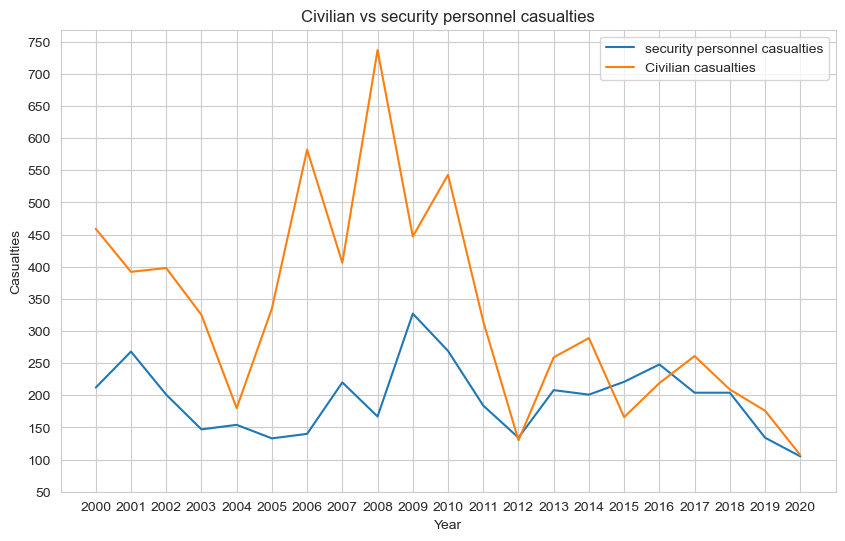

In [389]:
plt.plot(terror_analysis_df['iyear'],terror_analysis_df['security_fatalities'], label='security personnel casualties')
plt.plot(terror_analysis_df['iyear'],terror_analysis_df['civilian_casualties'], label='Civilian casualties')
plt.xlabel("Year")
plt.ylabel("Casualties")
plt.legend()
plt.title("Civilian vs security personnel casualties")
plt.xticks(ticks=range(2000,2021,1))
plt.yticks(ticks=range(50,800,50));
           


In [390]:
india_post_2000_df['attacktype1_txt'].unique()

array(['Armed Assault', 'Bombing/Explosion',
       'Hostage Taking (Kidnapping)', 'Assassination', 'Unarmed Assault',
       'Facility/Infrastructure Attack', 'Unknown', 'Hijacking',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [391]:
#An easier method to below syntax exists

In [392]:
mask3=india_post_2000_df['attacktype1_txt'].isin(['Hostage Taking (Kidnapping)','Hostage Taking (Barricade Incident)'])
mask4=india_post_2000_df['attacktype1_txt'].isin(['Armed Assault'])
mask5=india_post_2000_df['attacktype1_txt'].isin(['Bombing/Explosion'])
mask6=india_post_2000_df['attacktype1_txt'].isin(['Assassination'])
mask7=india_post_2000_df['attacktype1_txt'].isin(['Unarmed Assault'])
mask8=india_post_2000_df['attacktype1_txt'].isin(['Facility/Infrastructure Attack'])
mask9=india_post_2000_df['attacktype1_txt'].isin(['Unknown'])
mask10=india_post_2000_df['attacktype1_txt'].isin(['Hijacking'])
terror_analysis_df['Hostage taking']=(terror_analysis_df['iyear'].map(india_post_2000_df.loc[mask3].groupby('iyear').size()))
terror_analysis_df['Armed Assault']=(terror_analysis_df['iyear'].map(india_post_2000_df.loc[mask4].groupby('iyear').size()))
terror_analysis_df['Bombing/Explosion']=(terror_analysis_df['iyear'].map(india_post_2000_df.loc[mask5].groupby('iyear').size()))
terror_analysis_df['Assassination']=(terror_analysis_df['iyear'].map(india_post_2000_df.loc[mask6].groupby('iyear').size()))
terror_analysis_df['Unarmed Assault']=(terror_analysis_df['iyear'].map(india_post_2000_df.loc[mask7].groupby('iyear').size()))
terror_analysis_df['Facility/Infra attack']=(terror_analysis_df['iyear'].map(india_post_2000_df.loc[mask8].groupby('iyear').size()))
terror_analysis_df['Unknown type attacks']=(terror_analysis_df['iyear'].map(india_post_2000_df.loc[mask9].groupby('iyear').size()))
terror_analysis_df['Hijacking']=(terror_analysis_df['iyear'].map(india_post_2000_df.loc[mask10].groupby('iyear').size()))

In [393]:
terror_analysis_df


,iyear,incidents,fatalities,injuries,security_fatalities,civilian_casualties,Hostage taking,Armed Assault,Bombing/Explosion,Assassination,Unarmed Assault,Facility/Infra attack,Unknown type attacks,Hijacking
0,2000,180,671.0,761.0,212.0,459.0,16,64,84,11,1.0,3,1.0,NaN
1,2001,234,660.0,1144.0,268.0,392.0,12,96,92,21,4.0,6,3.0,NaN
2,2002,184,599.0,1186.0,201.0,398.0,6,66,91,18,NaN,1,1.0,1.0
3,2003,196,472.0,1183.0,147.0,325.0,9,70,89,22,1.0,5,NaN,NaN
4,2004,108,334.0,949.0,154.0,180.0,4,32,65,4,NaN,3,NaN,NaN
5,2005,146,468.0,1223.0,133.0,335.0,7,45,79,10,NaN,3,2.0,NaN
6,2006,167,722.0,2138.0,140.0,582.0,9,48,98,9,NaN,2,1.0,NaN
7,2007,150,626.0,1192.0,220.0,406.0,7,45,87,7,NaN,2,2.0,NaN
8,2008,535,904.0,1929.0,167.0,737.0,65,163,258,12,2.0,22,9.0,4.0
9,2009,672,774.0,854.0,327.0,447.0,54,232,246,12,2.0,82,39.0,5.0


In [394]:
terror_analysis_df=terror_analysis_df.fillna(0)

In [395]:
terror_analysis_df

,iyear,incidents,fatalities,injuries,security_fatalities,civilian_casualties,Hostage taking,Armed Assault,Bombing/Explosion,Assassination,Unarmed Assault,Facility/Infra attack,Unknown type attacks,Hijacking
0,2000,180,671.0,761.0,212.0,459.0,16,64,84,11,1.0,3,1.0,0.0
1,2001,234,660.0,1144.0,268.0,392.0,12,96,92,21,4.0,6,3.0,0.0
2,2002,184,599.0,1186.0,201.0,398.0,6,66,91,18,0.0,1,1.0,1.0
3,2003,196,472.0,1183.0,147.0,325.0,9,70,89,22,1.0,5,0.0,0.0
4,2004,108,334.0,949.0,154.0,180.0,4,32,65,4,0.0,3,0.0,0.0
5,2005,146,468.0,1223.0,133.0,335.0,7,45,79,10,0.0,3,2.0,0.0
6,2006,167,722.0,2138.0,140.0,582.0,9,48,98,9,0.0,2,1.0,0.0
7,2007,150,626.0,1192.0,220.0,406.0,7,45,87,7,0.0,2,2.0,0.0
8,2008,535,904.0,1929.0,167.0,737.0,65,163,258,12,2.0,22,9.0,4.0
9,2009,672,774.0,854.0,327.0,447.0,54,232,246,12,2.0,82,39.0,5.0


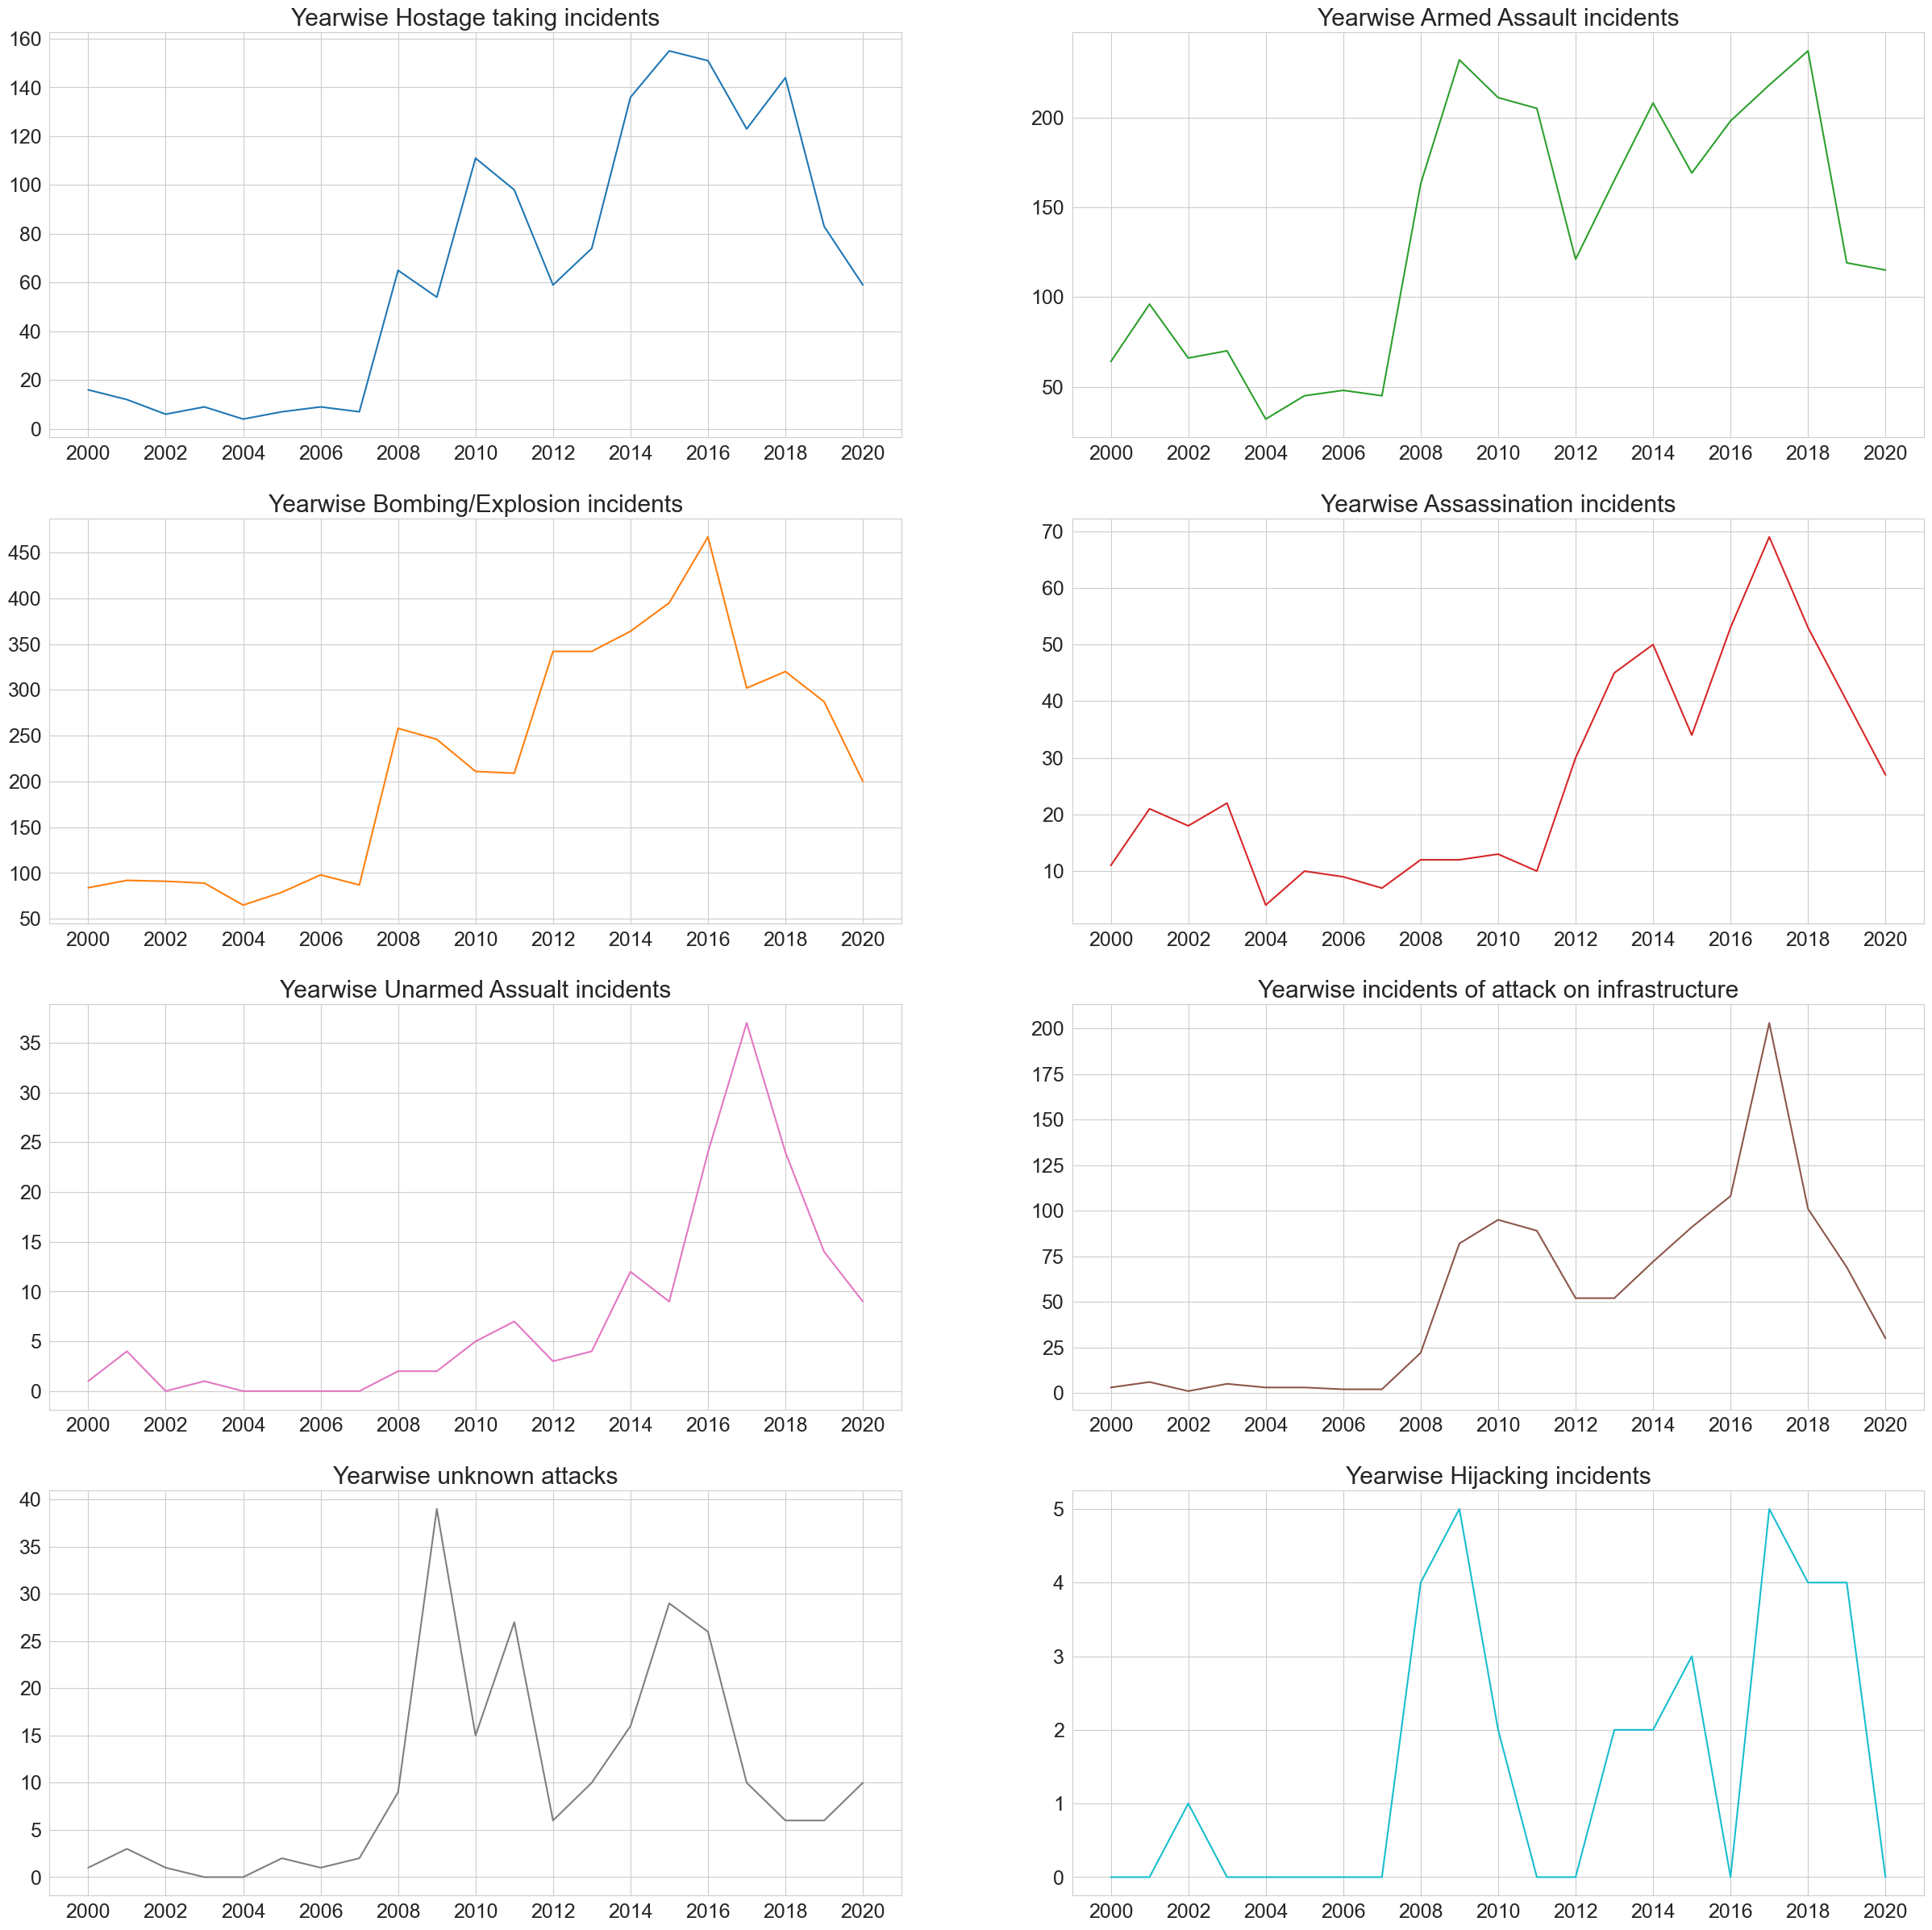

In [396]:
plt.rcParams['figure.figsize'] = [30, 30]
plt.rcParams['font.size']=18
fig, axs=plt.subplots(4,2)
axs[0][0].plot(terror_analysis_df['iyear'],terror_analysis_df['Hostage taking'], 'tab:blue')
axs[0][0].set_title('Yearwise Hostage taking incidents')
axs[0][1].plot(terror_analysis_df['iyear'],terror_analysis_df['Armed Assault'], 'tab:green')
axs[0][1].set_title('Yearwise Armed Assault incidents');
axs[1][0].plot(terror_analysis_df['iyear'],terror_analysis_df['Bombing/Explosion'], 'tab:orange')
axs[1][0].set_title('Yearwise Bombing/Explosion incidents');
axs[1][1].plot(terror_analysis_df['iyear'],terror_analysis_df['Assassination'], 'tab:red')
axs[1][1].set_title('Yearwise Assassination incidents');
axs[2][0].plot(terror_analysis_df['iyear'],terror_analysis_df['Unarmed Assault'], 'tab:pink')
axs[2][0].set_title('Yearwise Unarmed Assualt incidents');
axs[2][1].plot(terror_analysis_df['iyear'],terror_analysis_df['Facility/Infra attack'], 'tab:brown')
axs[2][1].set_title('Yearwise incidents of attack on infrastructure');
axs[3][0].plot(terror_analysis_df['iyear'],terror_analysis_df['Unknown type attacks'], 'tab:grey')
axs[3][0].set_title('Yearwise unknown attacks');
axs[3][1].plot(terror_analysis_df['iyear'],terror_analysis_df['Hijacking'], 'tab:cyan')
axs[3][1].set_title('Yearwise Hijacking incidents');
for ax in axs.flat:   # axs.flat flattens the 2D array
    ax.set_xticks(range(2000, 2021, 2))


In [397]:
pre_demo_df=terror_analysis_df[(terror_analysis_df['iyear']>=2012) & (terror_analysis_df['iyear']<=2015)]
post_demo_df=terror_analysis_df[(terror_analysis_df['iyear']>=2017) & (terror_analysis_df['iyear']<=2020)]

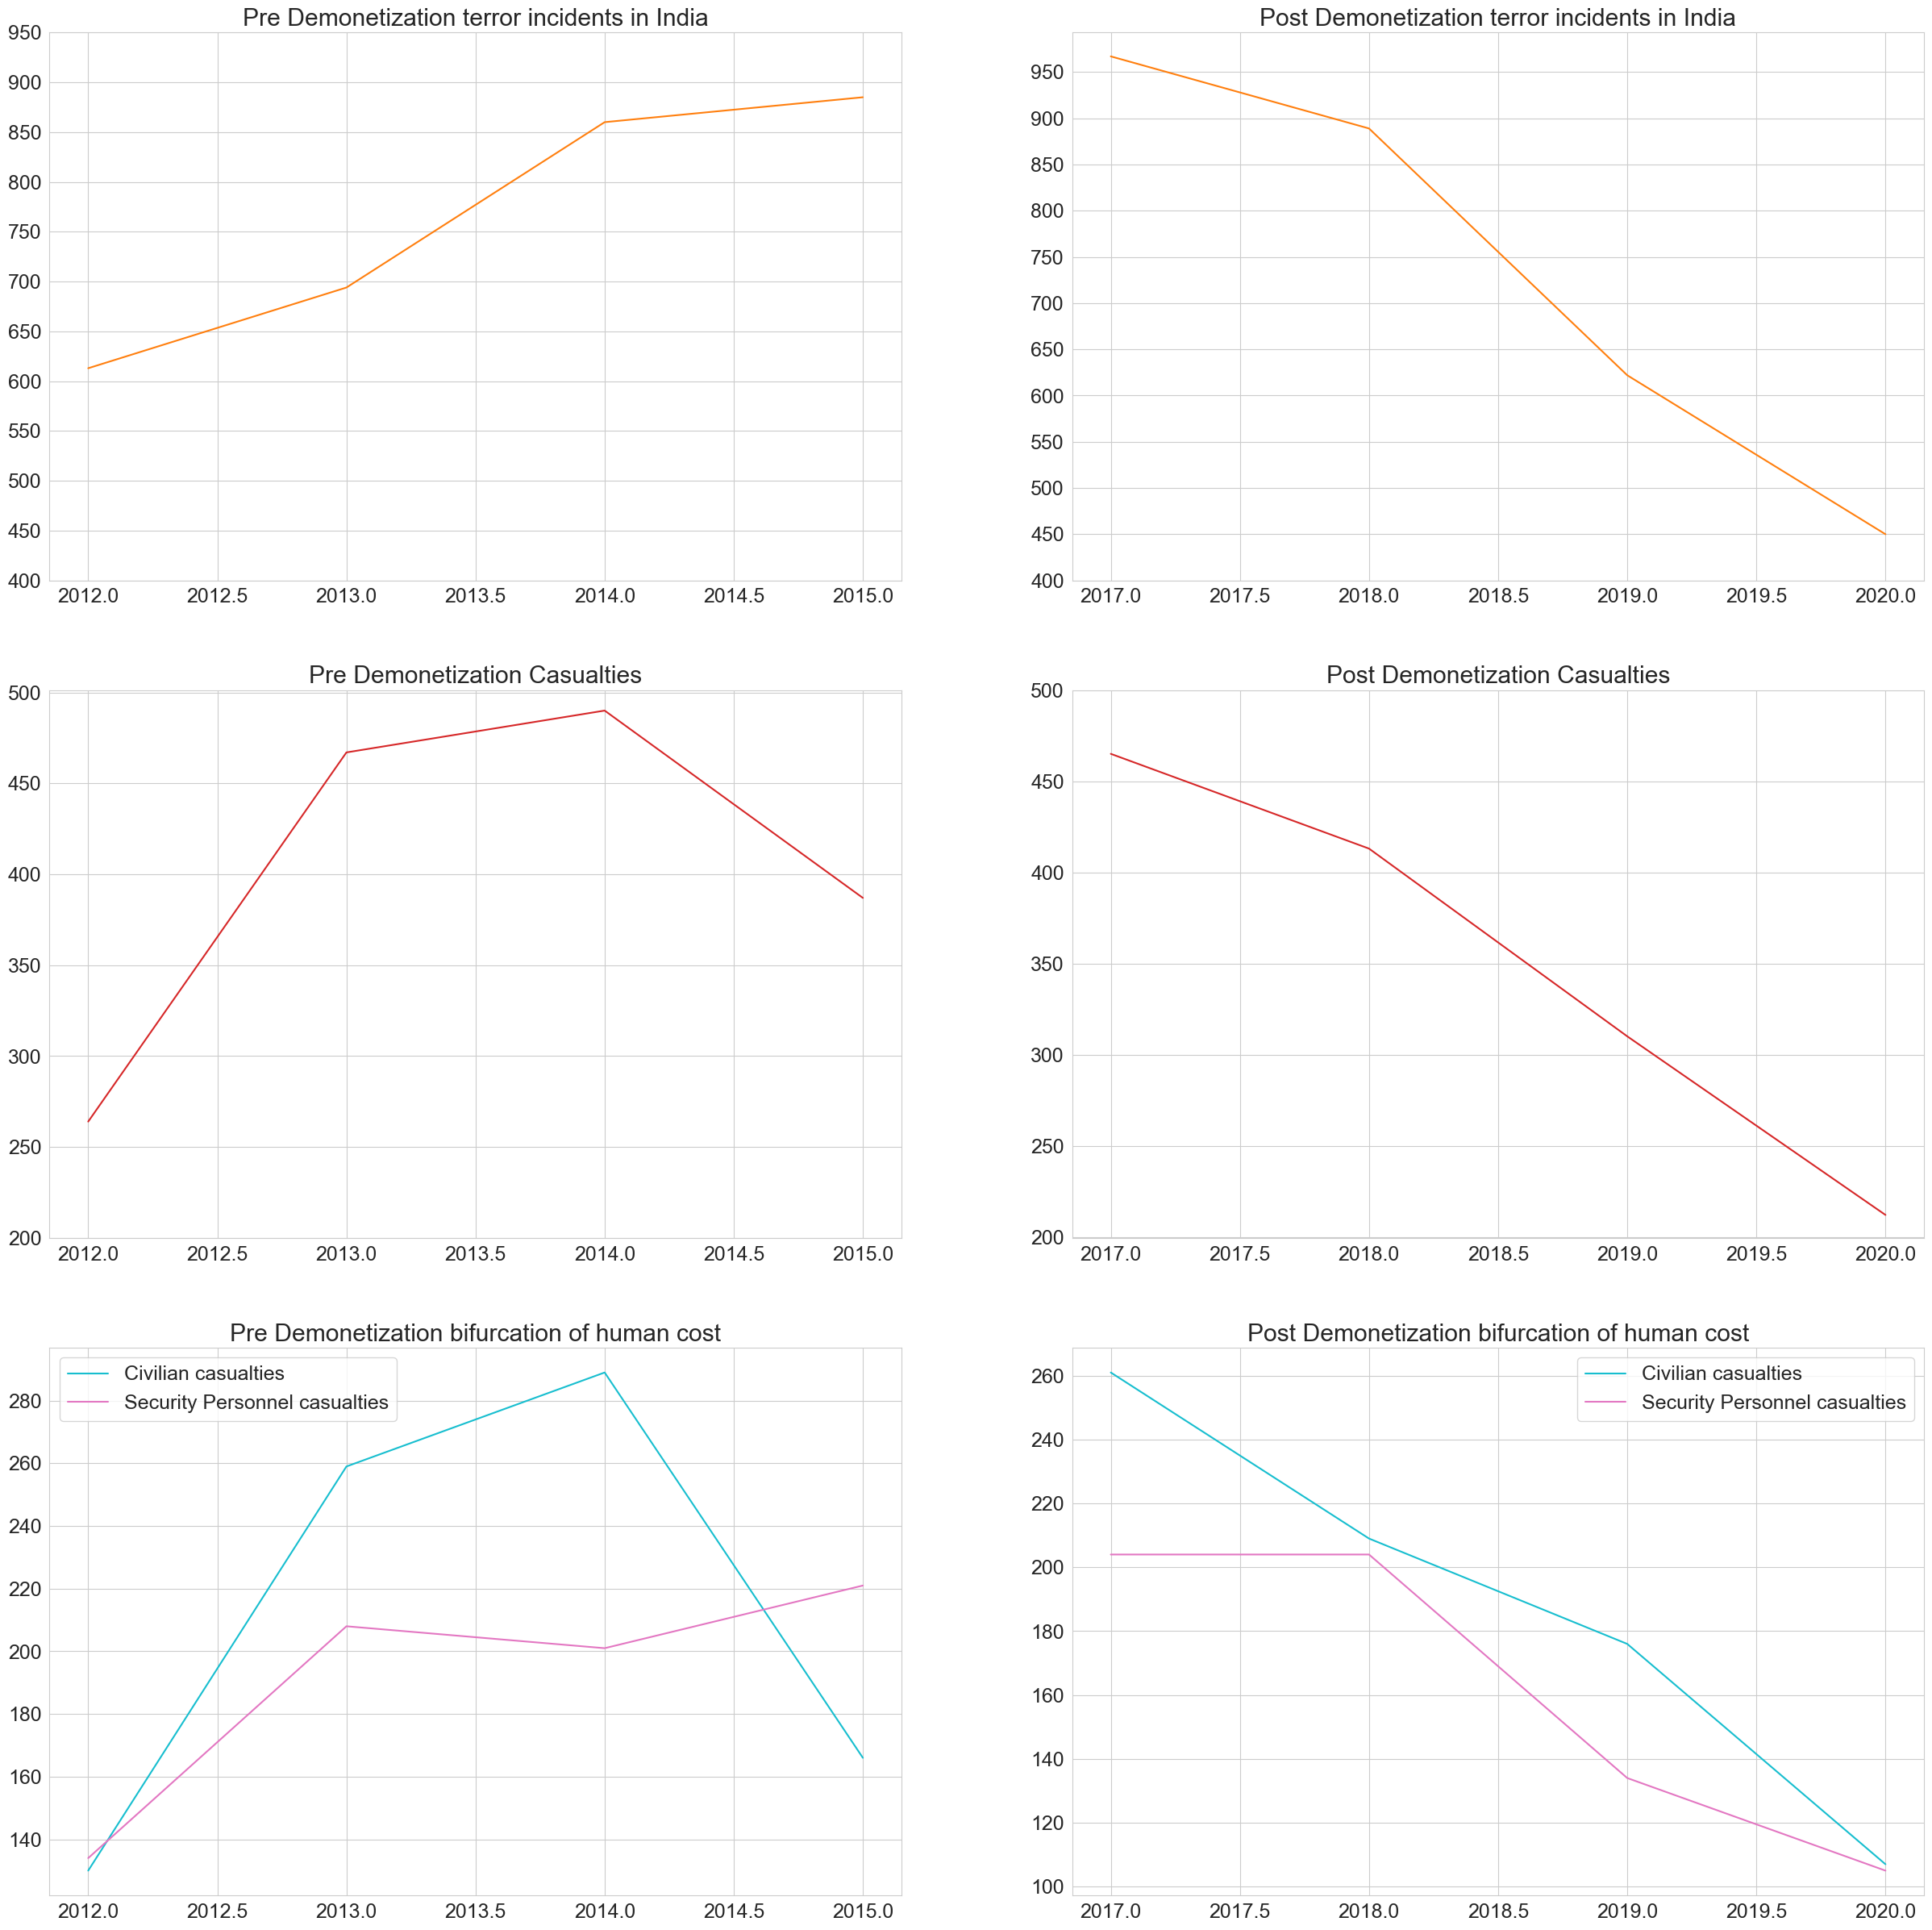

In [398]:
fig, ax=plt.subplots(3,2)
ax[0][0].plot(pre_demo_df['iyear'], pre_demo_df['incidents'],'tab:orange')
ax[0][1].plot(post_demo_df['iyear'], post_demo_df['incidents'], 'tab:orange')
ax[0][0].set_yticks(range(400,1000,50))
ax[0][1].set_yticks(range(400,1000,50));
ax[1][0].plot(pre_demo_df['iyear'], pre_demo_df['fatalities'],'tab:red')
ax[1][1].plot(post_demo_df['iyear'], post_demo_df['fatalities'], 'tab:red');
ax[1][0].set_yticks(range(200,550,50))
ax[1][1].set_yticks(range(200,550,50));
ax[2][0].plot(pre_demo_df['iyear'], pre_demo_df['civilian_casualties'],'tab:cyan',label='Civilian casualties' )
ax[2][0].plot(pre_demo_df['iyear'], pre_demo_df['security_fatalities'],'tab:pink',label= 'Security Personnel casualties')
ax[2][1].plot(post_demo_df['iyear'], post_demo_df['civilian_casualties'], 'tab:cyan',label='Civilian casualties')
ax[2][1].plot(post_demo_df['iyear'], post_demo_df['security_fatalities'], 'tab:pink',label= 'Security Personnel casualties')
ax[2][1].legend()
ax[2][0].legend();
ax[0][0].set_title('Pre Demonetization terror incidents in India');
ax[0][1].set_title('Post Demonetization terror incidents in India');
ax[1][0].set_title('Pre Demonetization Casualties');
ax[1][1].set_title('Post Demonetization Casualties');
ax[2][0].set_title('Pre Demonetization bifurcation of human cost');
ax[2][1].set_title('Post Demonetization bifurcation of human cost');



In [399]:
india_post_2000_df

,iyear,imonth,iday,provstate,city,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,gname,weaptype1_txt,nkill,nwound,summary,scite1,date
69835,2000,1,1,Jammu and Kashmir,Udhampur,Armed Assault,Police,"Police Building (headquarters, station, school)",The Central Reserve Police Force 68 battalion ...,Lashkar-e-Taiba (LeT),Firearms,1.0,2.0,01/01/2000: Members of Lashkar-e Taiba attacke...,“Lashkar 'Suicide' Squad Attacks Army Camp in ...,2000-01-01
69839,2000,1,1,Assam,Kakotibari,Bombing/Explosion,Utilities,NaN,An Oil and Natural Gas Commission pipeline at ...,United Liberation Front of Assam (ULFA),Explosives,0.0,0.0,01/01/2000: An Oil and Natural Gas Commission ...,“India: ULFA Militants Blow Up Oil Pipeline in...,2000-01-01
69867,2000,1,3,Jammu and Kashmir,Srinagar,Bombing/Explosion,Private Citizens & Property,Marketplace/Plaza/Square,A vegetable market in Srinagar,Unknown,Explosives,18.0,30.0,01/03/2000: A bomb exploded at a vegetable mar...,"Law Kumar Mishra, “Eighteen People Killed in L...",2000-01-03
69887,2000,1,6,Delhi,New Delhi,Bombing/Explosion,Transportation,Train/Train Tracks/Trolley,A passenger train at the Old Delhi train station,Unknown,Explosives,0.0,23.0,01/06/2000: A bomb exploded on a passenger tra...,"“23 injured in Delhi railway station blast,” T...",2000-01-06
69888,2000,1,7,Andhra Pradesh,Unknown,Bombing/Explosion,Government (General),Politician or Political Party Movement/Meeting...,"G. Sukhender Reddy, Telugu Desam Party Member ...",People's War Group (PWG),Explosives,0.0,0.0,01/07/2000: Six Maoist guerrillas from the Peo...,“Extremists Blast House of Ruling Party MP in ...,2000-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209681,2020,12,30,Chhattisgarh,Pusnar,Bombing/Explosion,Unknown,NaN,Unknown,Maoists,Explosives,0.0,1.0,12/30/2020: An explosive device detonated whil...,"""Chhattisgarh: CAF jawan injured in IED blast,...",2020-12-30
209684,2020,12,30,Jammu and Kashmir,Jandi,Bombing/Explosion,Religious Figures/Institutions,Place of Worship,Temple,Unknown,Explosives,0.0,0.0,12/30/2020: Assailants threw a grenade at a te...,"""Terrorist throws hand grenade at historic tem...",2020-12-30
209686,2020,12,30,Odisha,Malakangiri,Bombing/Explosion,Military,"Military Personnel (soldiers, troops, officers...",Security Forces,Maoists,Explosives,0.0,1.0,12/30/2020: An explosive device detonated targ...,"""Maoist Landmine Blast In Odisha-Chhattisgarh ...",2020-12-30
209692,2020,12,31,Jammu and Kashmir,Srinagar,Armed Assault,Business,Retail/Grocery/Bakery,Jeweler: Satpal Singh Nischal,The Resistance Front (TRF),Firearms,1.0,0.0,12/31/2020: Assailants shot and killed Satpal ...,"""Police access CCTV footage, get leads in jewe...",2020-12-31


In [400]:
state_df=india_post_2000_df['provstate'].value_counts()

In [401]:
state_df=pd.DataFrame(state_df)

In [402]:
state_df=state_df.reset_index()

In [403]:
state_df=state_df.rename(columns={'provstate':'State'})

In [404]:
state_df

,State,count
0,Jammu and Kashmir,2521
1,Chhattisgarh,1284
2,Manipur,1134
3,Jharkhand,1051
4,Assam,946
5,Bihar,712
6,West Bengal,618
7,Odisha,500
8,Maharashtra,322
9,Meghalaya,312


In [405]:
jk_cross_border_df=india_post_2000_df[(india_post_2000_df['provstate'])=='Jammu and Kashmir']

In [406]:
jk_cross_border_df['gname'].value_counts()

gname
Unknown                                  1692
Hizbul Mujahideen (HM)                    254
Lashkar-e-Taiba (LeT)                     208
Jaish-e-Mohammad (JeM)                    122
Separatists                                33
Muslim extremists                          27
Militants                                  22
Al-Mansoorian                              16
Tehrik al-Mojahedin                        15
Lashkar-e-Islam (India)                    13
Muslim Militants                           12
The Resistance Front (TRF)                 11
Jamiat ul-Mujahedin (JuM)                   9
Al-Badr                                     7
Al-Umar Mujahideen                          7
Khorasan Chapter of the Islamic State       7
Ansar Ghazwat-ul-Hind                       5
Islamic Front                               5
Al-Shuda Brigade                            5
Al-Madina                                   4
Al-Arifeen                                  4
Muslim Separatists          

In [407]:
cbt_df=jk_cross_border_df.groupby('gname').agg( incidents =('iyear', 'count'), casualties=('nkill', 'sum'), injuries=('nwound','sum')).reset_index()

In [408]:
cbt_df=cbt_df.sort_values(by='casualties', ascending=False).reset_index()

In [409]:
cbt_df.drop(columns='index', axis=1)

,gname,incidents,casualties,injuries
0,Unknown,1692,1213.0,4120.0
1,Lashkar-e-Taiba (LeT),208,680.0,824.0
2,Hizbul Mujahideen (HM),254,382.0,742.0
3,Jaish-e-Mohammad (JeM),122,205.0,308.0
4,Al-Mansoorian,16,70.0,152.0
5,Muslim extremists,27,44.0,155.0
6,Militants,22,43.0,53.0
7,Separatists,33,36.0,48.0
8,Muslim Militants,12,35.0,79.0
9,Jamiat ul-Mujahedin (JuM),9,34.0,84.0


In [410]:
others=cbt_df.iloc[4:].sum(numeric_only=True)
others['gname']='Others'

In [411]:
cbt_df=pd.concat([cbt_df.iloc[:4], others.to_frame().T]).reset_index()
                  

In [412]:
cbt_df=cbt_df.drop('level_0', axis=1)

In [413]:
cbt_df=cbt_df.drop('index',axis=1)

In [414]:
cbt_df

,gname,incidents,casualties,injuries
0,Unknown,1692,1213.0,4120.0
1,Lashkar-e-Taiba (LeT),208,680.0,824.0
2,Hizbul Mujahideen (HM),254,382.0,742.0
3,Jaish-e-Mohammad (JeM),122,205.0,308.0
4,Others,245.0,471.0,1155.0


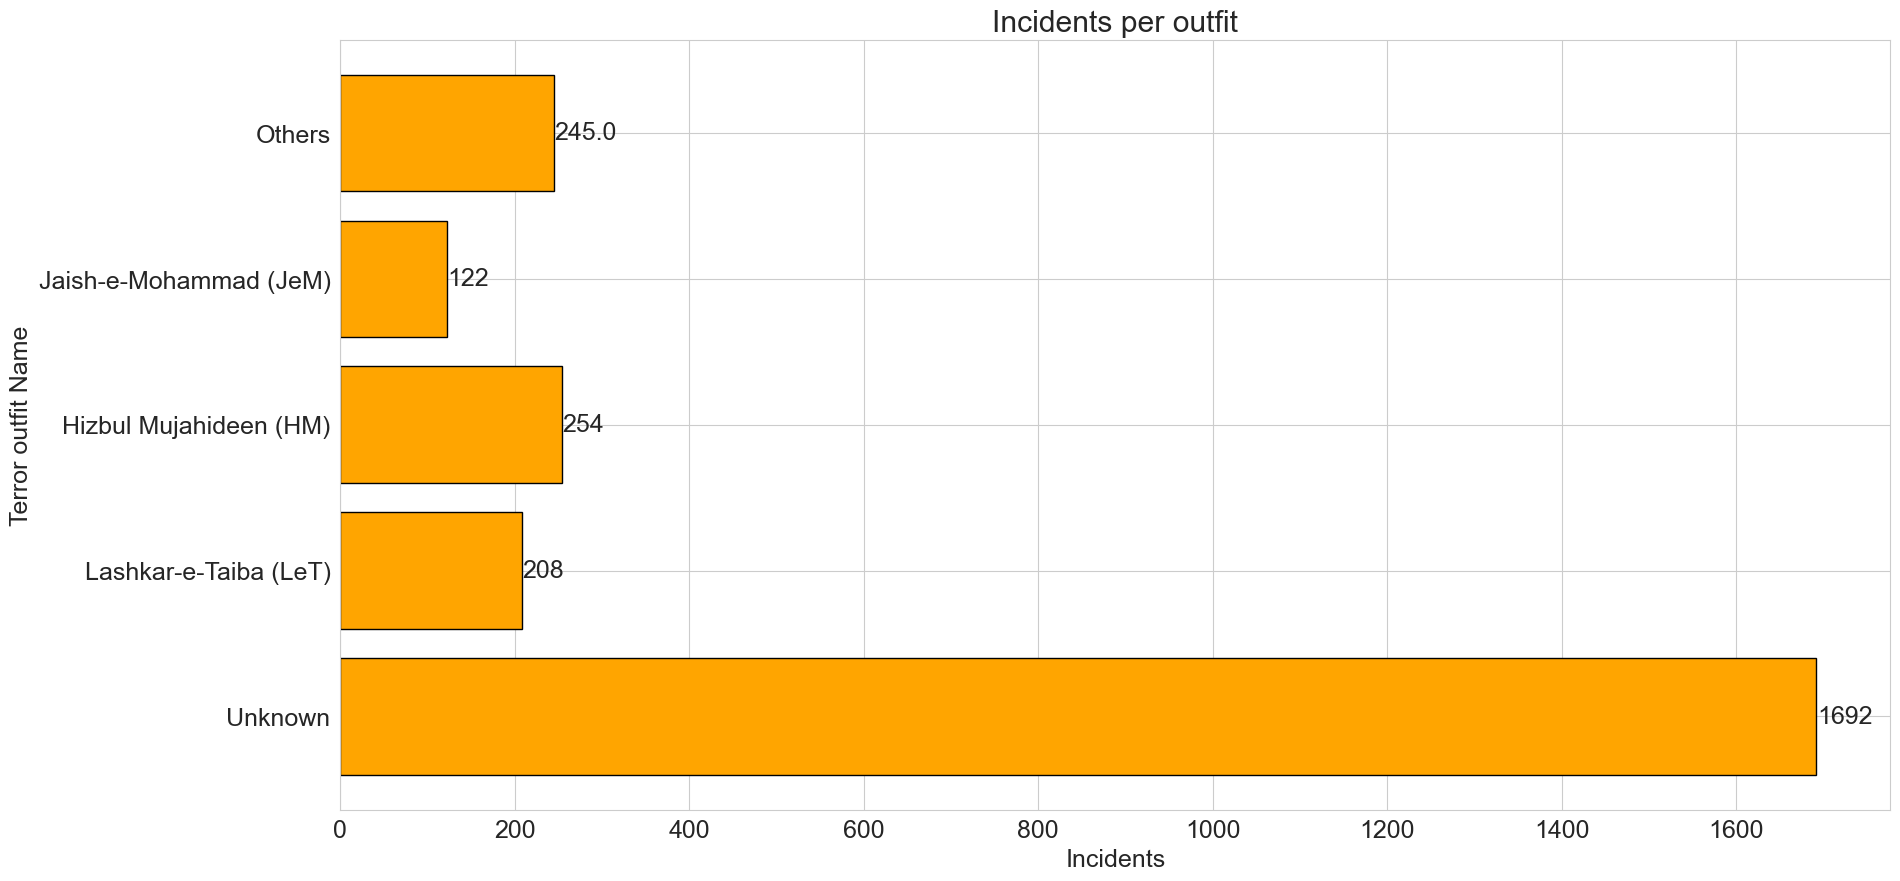

In [415]:
plt.rcParams['figure.figsize']=[20,10]
plt.barh(cbt_df['gname'], cbt_df['incidents'], color='orange', edgecolor='black')
plt.ylabel("Terror outfit Name")
plt.xlabel("Incidents")
plt.title("Incidents per outfit");
for i, v in enumerate(cbt_df['incidents']): plt.text(v + 0.5, i, str(v), va='center');


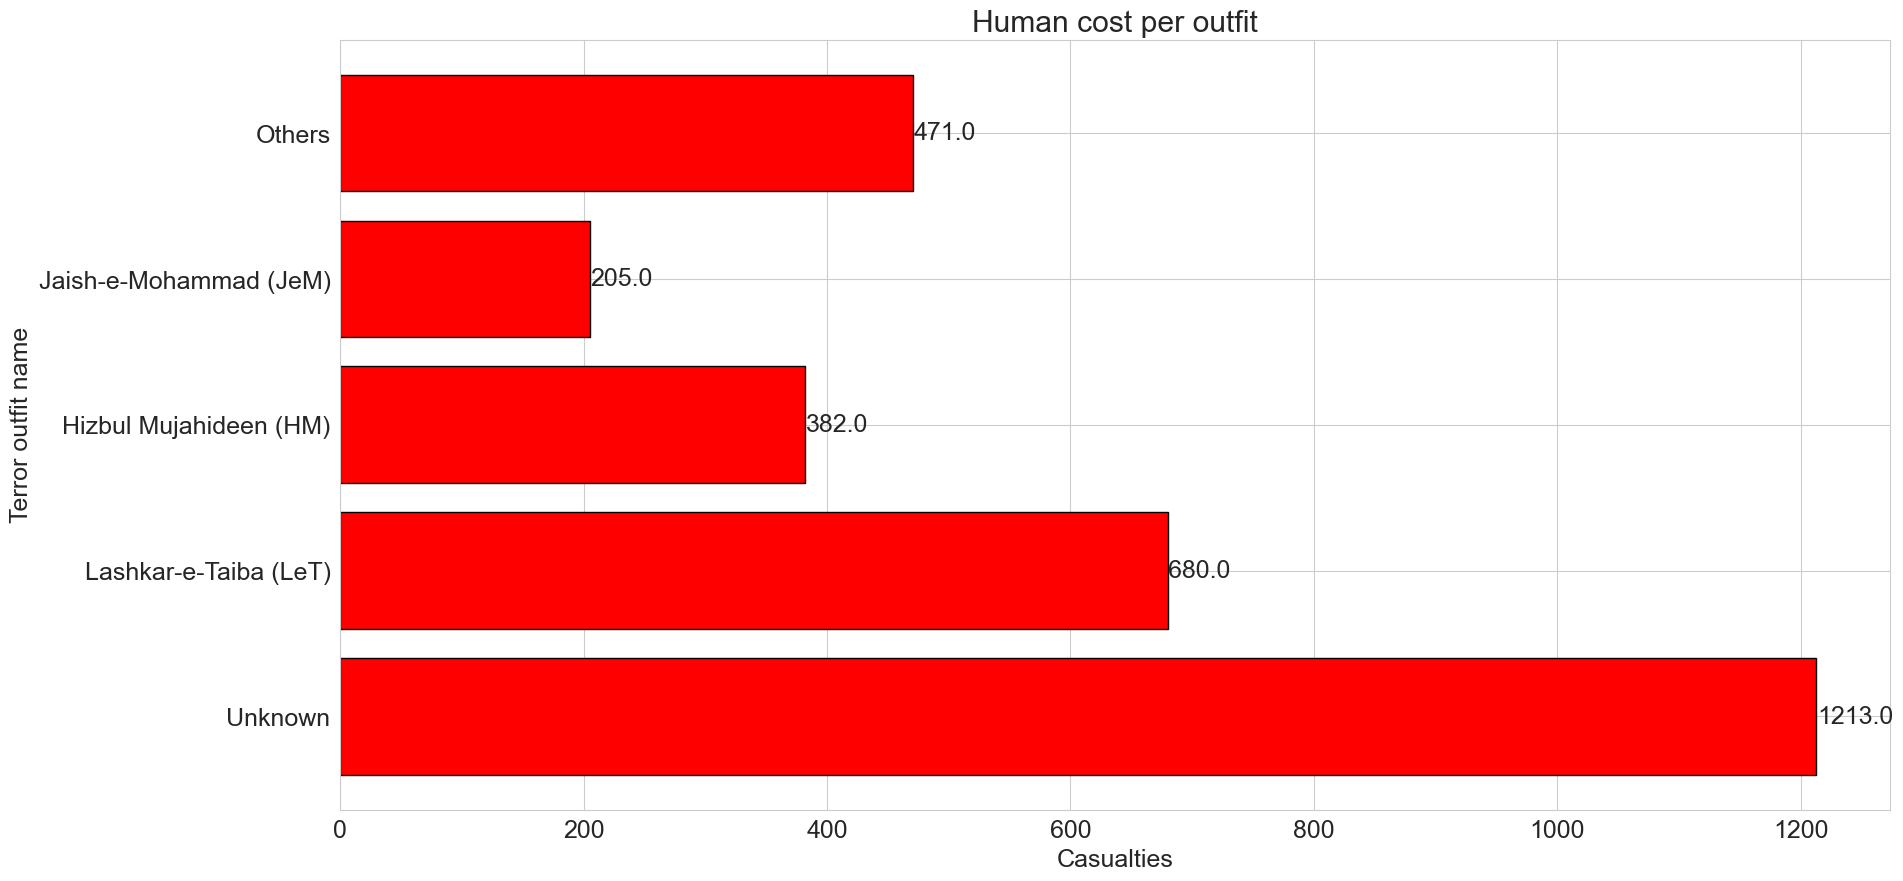

In [416]:
plt.barh(cbt_df['gname'], cbt_df['casualties'], color='red', edgecolor='black')
plt.ylabel("Terror outfit name")
plt.xlabel("Casualties")
plt.title("Human cost per outfit");
for i, v in enumerate(cbt_df['casualties']): plt.text(v + 0.5, i, str(v), va='center');


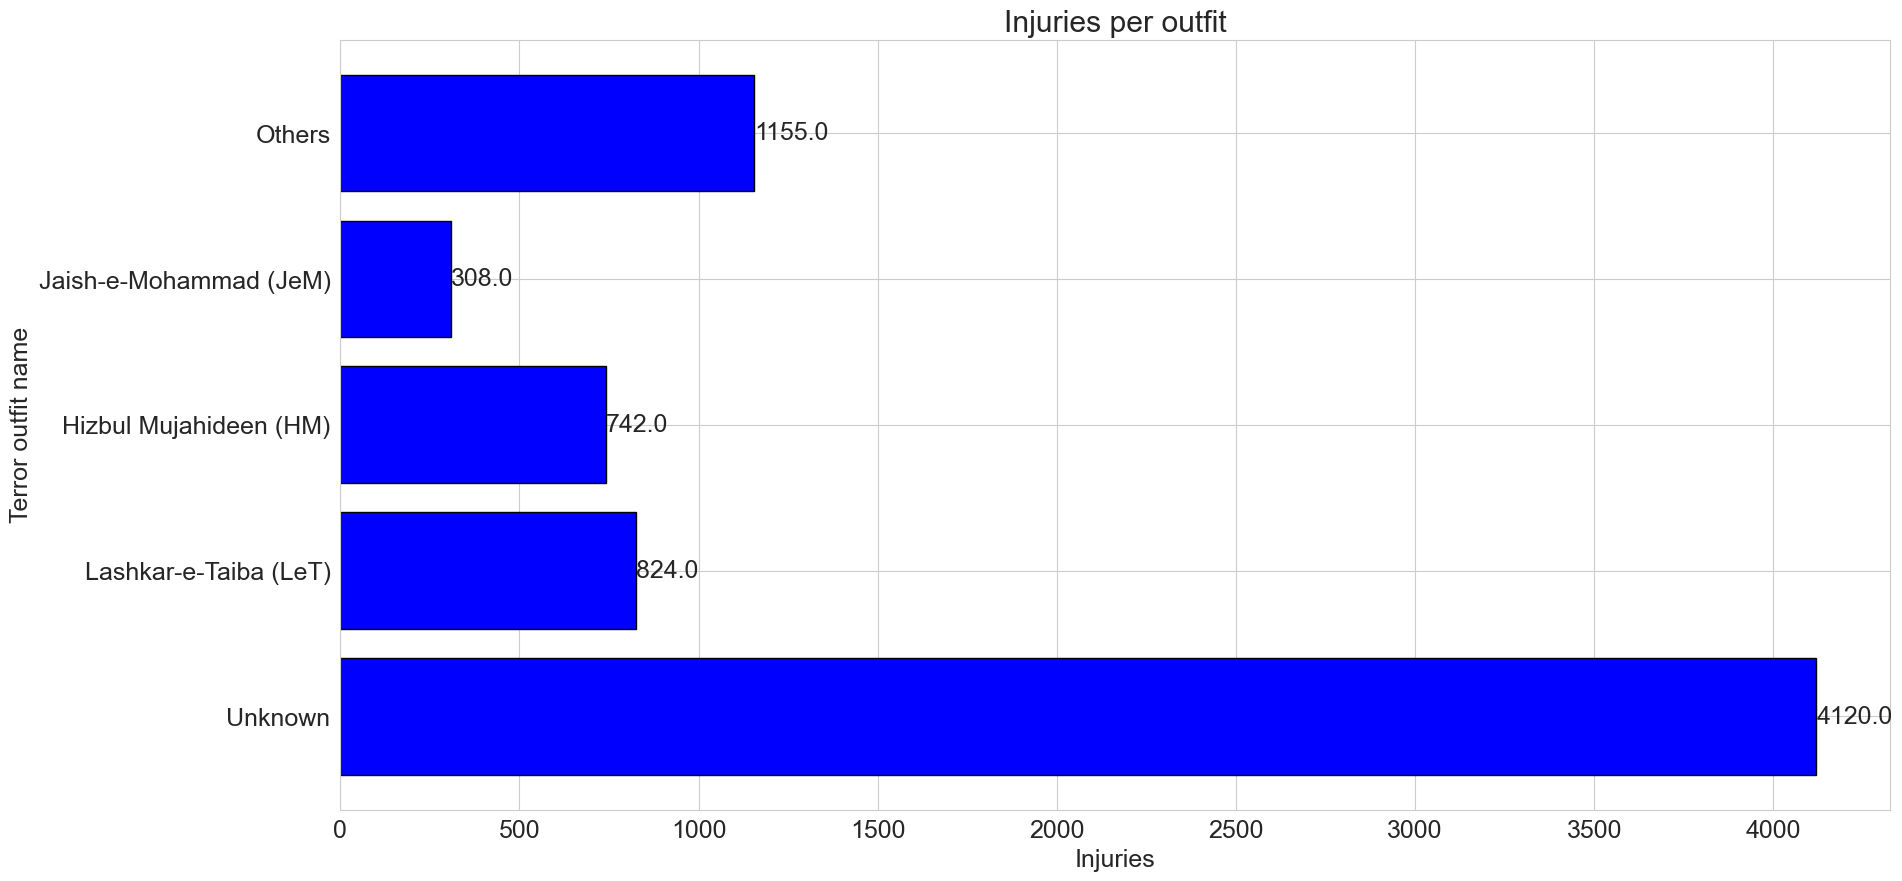

In [417]:
plt.barh(cbt_df['gname'], cbt_df['injuries'], color='blue', edgecolor='black')
plt.ylabel("Terror outfit name")
plt.xlabel("Injuries")
plt.title("Injuries per outfit");
for i, v in enumerate(cbt_df['injuries']): plt.text(v + 0.5, i, str(v), va='center');

In [418]:
counts=jk_cross_border_df.groupby('iyear')['gname'].value_counts().unstack(fill_value=0)

In [419]:
counts

gname,Al-Arifeen,Al-Badr,Al-Fajr,Al-Hamas Mujahideen,Al-Madina,Al-Mansoorian,Al-Nasireen Group,Al-Nasirin (India),Al-Shuda Brigade,Al-Umar Mujahideen,Ansar Ghazwat-ul-Hind,Guerrillas,Gunmen,Harakat ul-Mujahidin (HuM),Harkatul Jihad-e-Islami,Hind Province of the Islamic State,Hizbul Mujahideen (HM),Islamic Fateh,Islamic Front,Islamic Movement of Kashmir,Jaish-e-Mohammad (JeM),Jamiat ul-Mujahedin (JuM),Jammu and Kashmir Islamic Front,Kashmir Freedom Force,Kashmiri extremists,Khorasan Chapter of the Islamic State,Lashkar-e-Islam (India),Lashkar-e-Jhangvi,Lashkar-e-Taiba (LeT),Maoist Communist Center (MCC),Maoists,Militants,Muslim Militants,Muslim Rebels,Muslim Separatists,Muslim extremists,Muslims,Quit Kashmir Movement (QKM),Save Kashmir Movement,Separatists,Shiv Sena,Tehrik al-Mojahedin,Tehrik-e-Hurriyat (TeH),The Resistance Front (TRF),United Jihad Council,Unknown
iyear,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,10,0,0,0,3,1,0,0,1,0,0,0,8,0,0,3,2,0,0,1,0,0,0,2,0,0,0,0,0,50
2001,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,10,0,0,0,4,0,0,0,0,0,0,2,21,0,0,11,1,0,3,2,1,0,0,0,0,0,0,0,0,110
2002,2,1,0,0,3,1,0,1,0,1,0,0,1,0,0,0,4,0,1,0,1,3,0,0,1,0,0,0,13,0,0,6,9,2,1,2,0,0,1,1,0,0,0,0,0,75
2003,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,8,1,0,0,2,1,0,1,0,0,0,0,4,0,0,0,0,1,0,16,0,0,0,1,0,1,0,0,0,81
2004,1,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0,0,0,4,0,0,2,0,0,0,0,0,0,51
2005,1,0,0,0,0,7,2,0,0,0,0,0,0,0,1,0,5,0,2,0,1,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,63
2006,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,5,0,0,0,6,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57
2007,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,27
2008,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38


In [420]:
counts = counts[['Jaish-e-Mohammad (JeM)', 
                 'Hizbul Mujahideen (HM)', 
                 'Lashkar-e-Taiba (LeT)']]


In [421]:
counts=counts.reset_index()

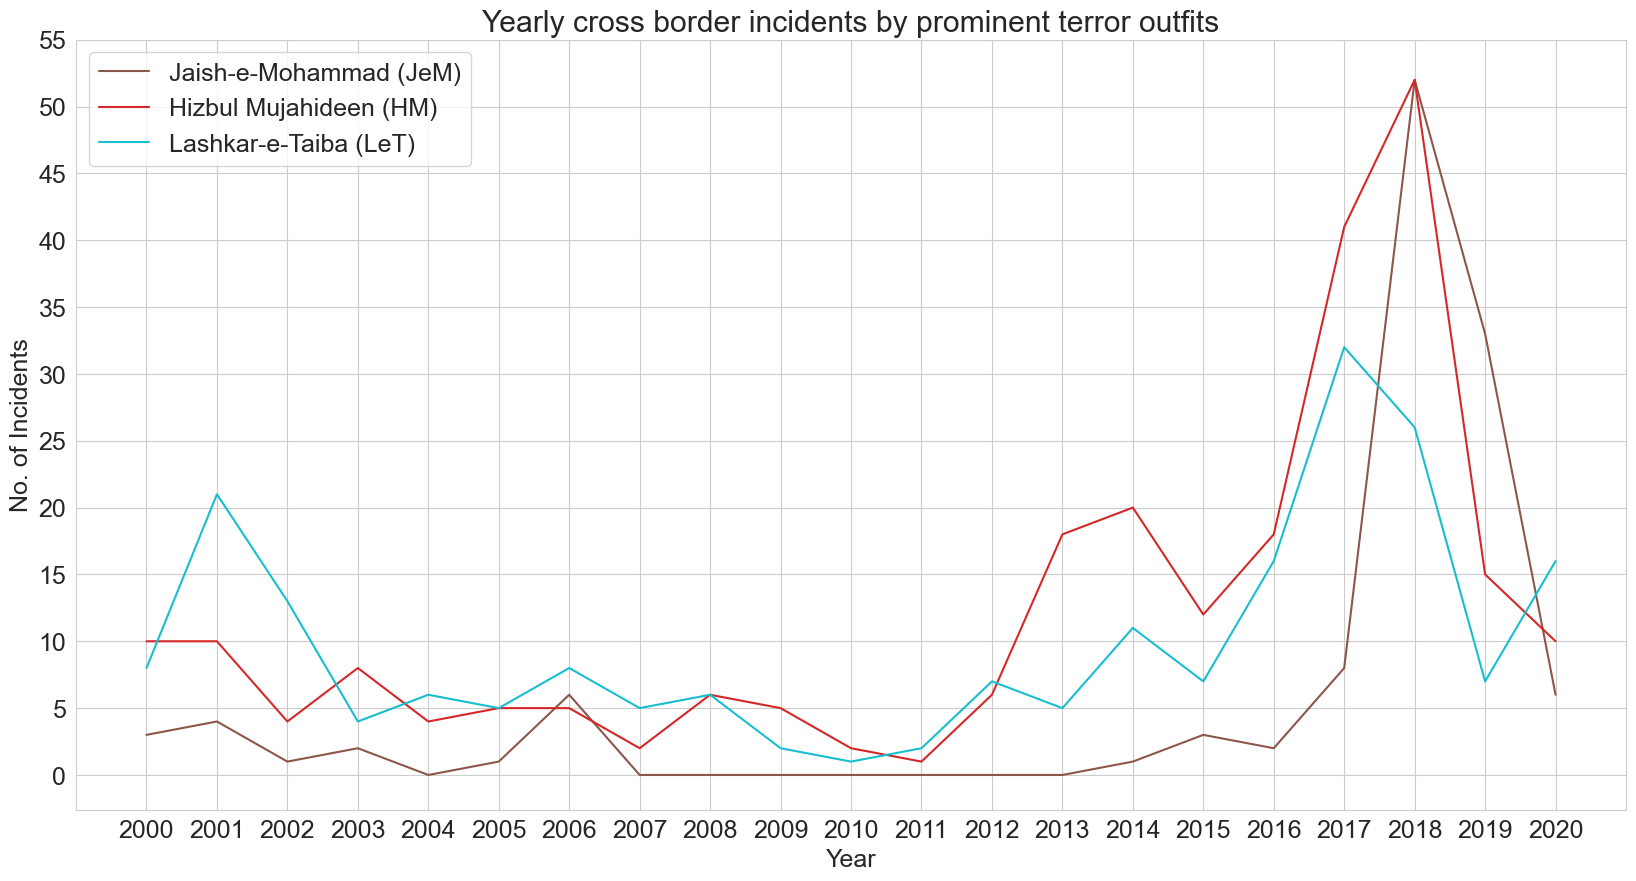

In [422]:
plt.rcParams['figure.figsize']=[20,10]
plt.plot(counts['iyear'],counts['Jaish-e-Mohammad (JeM)'], 'tab:brown', label='Jaish-e-Mohammad (JeM)');
plt.plot(counts['iyear'],counts['Hizbul Mujahideen (HM)'], 'tab:red', label='Hizbul Mujahideen (HM)');
plt.plot(counts['iyear'],counts['Lashkar-e-Taiba (LeT)'], 'tab:cyan', label='Lashkar-e-Taiba (LeT)');
plt.xlabel('Year');
plt.ylabel('No. of Incidents');
plt.xticks(range(2000,2021,1));
plt.yticks(range(0,60,5));
plt.title('Yearly cross border incidents by prominent terror outfits');
plt.legend();

In [424]:
india_post_2000_df.to_csv(r'C:\Users\byome\Phyton Project\india_terrorism_data analysis\data\processed\India_post_2000.csv',index=False)

In [426]:
terror_analysis_df.to_csv(r'C:\Users\byome\Phyton Project\india_terrorism_data analysis\data\processed\Terror_Analysis.csv',index=False)

In [428]:
pre_demo_df.to_csv(r'C:\Users\byome\Phyton Project\india_terrorism_data analysis\data\processed\Pre_demonetization.csv', index=False)


In [430]:
post_demo_df.to_csv(r'C:\Users\byome\Phyton Project\india_terrorism_data analysis\data\processed\Post_demonetization.csv',index=False)


In [432]:
jk_cross_border_df.to_csv(r"C:\Users\byome\Phyton Project\india_terrorism_data analysis\data\processed\J&K_cross_border.csv",index=False)